# BOARD GAME REVIEW PREDICTION
## DATA FROM https://github.com/ThaWeatherman/scrapers.git
AUTHOR - HARSHIT SHARMA

In [85]:
#import the required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [86]:
#importing the dataset
games = pd.read_csv("games.csv")

In [87]:
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


we will try to predict average_rating 

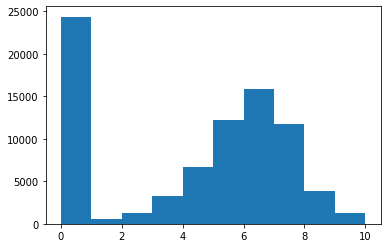

In [88]:
#lets make a histogram of all ratings of avg_rating
#data preprocessing
plt.hist(games["average_rating"])
plt.show()


we see most of ratings are zero so check the reason behind that

In [89]:
#printing the 1st row of all games having zero rating
print(games[games["average_rating"] == 0].iloc[0])
print(games[games["average_rating"] > 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

we see that these game swith zero scores are not rates and do not have other features so lets remove all games with zero rating and then see

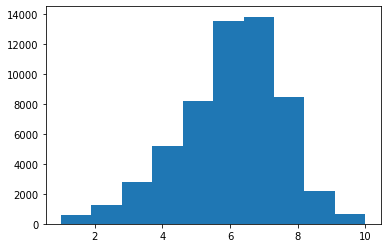

In [90]:
#removing zero reviews rows
games = games[games["users_rated"]>0]

#removing missing value rows also
games = games.dropna(axis = 0)

# now lets see the data again
plt.hist(games["average_rating"])
plt.show()

Now we see that data is more useful it has a almost normal gaussian distribution slightly skewed to right

In [91]:
#lets now remove the redundant features
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


lets make a correlation matrix using seaborn library

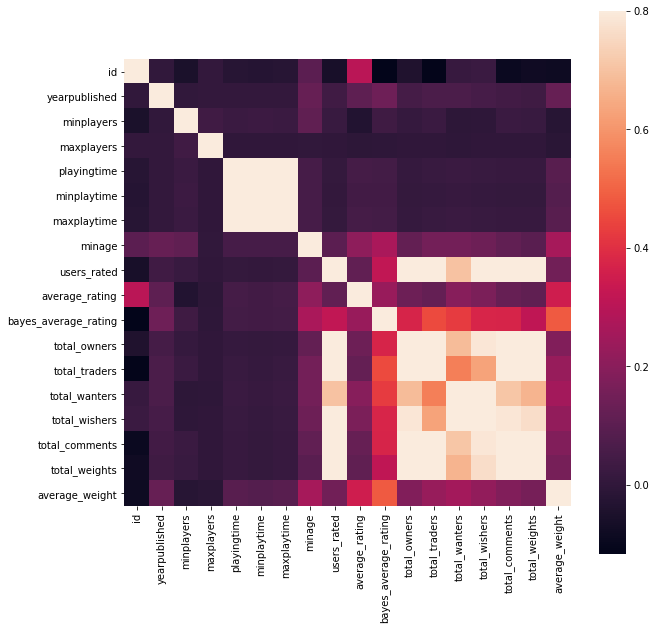

In [92]:
corrmat = games.corr()
fig = plt.figure(figsize = (10,10))
sns.heatmap(corrmat, vmax =0.8, square = True)
plt.show()


This is a heatmap showing correlation between diffrent features/columns

We see id is highly correlated with average rating if we use id in ML model it will learn it as a feature and so will
ultimately turn to overfitting.

In [93]:
columns = games.columns.tolist()
# removing redundant columns
columns = [c for c in columns if c not in ['id', 'bayes_average_rating','average_rating','type','name']]

#string the target
target = "average_rating"

In [94]:
#generate the training and testing dataset

train_X,test_X,train_y,test_y = train_test_split(games[columns],games[target], train_size = 0.8, random_state =1)

# train = games.sample(frac = 0.8, random_state= 1)
# test = games.loc[~games.index.isin(train.index)]
print(train_X.shape,test_X.shape,train_y.shape,test_y.shape)

(45515, 15) (11379, 15) (45515,) (11379,)


In [95]:
print(train_X.iloc[100],train_y.iloc[100])

yearpublished     2006.0
minplayers           2.0
maxplayers           2.0
playingtime         15.0
minplaytime         15.0
maxplaytime         15.0
minage               6.0
users_rated          3.0
total_owners         5.0
total_traders        0.0
total_wanters        0.0
total_wishers        0.0
total_comments       3.0
total_weights        0.0
average_weight       0.0
Name: 29029, dtype: float64 3.33333


In [96]:
#import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
LR = LinearRegression()
#fitting the model to training data
LR.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
predictions = LR.predict(test_X)
mean_squared_error(predictions,test_y)

2.0878654278597404

In [98]:
#importing a non linear model 
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 1)

#fitting to training data
RF.fit(train_X,train_y)
predictions_rf = RF.predict(test_X)
mean_squared_error(predictions_rf,test_y)

1.4575588917181705

we see that mean squared error is much lower for a random forst regressor so its a better model

In [99]:
#the improvement 
print("The mean squared error is reduced by {}% by using a random forest regressor instead of a linear regeressor".format(((2.087-1.457)/2.08)*100))

The mean squared error is reduced by 30.28846153846154% by using a random forest regressor instead of a linear regeressor


In [100]:
#an example
print(test_X.iloc[0])
rating_LR = LR.predict(test_X.iloc[0].values.reshape(1,-1))
rating_RF = RF.predict(test_X.iloc[0].values.reshape(1,-1))
print(rating_LR,rating_RF)
print("True Rating = ", test_y.iloc[0])

yearpublished     2013.0000
minplayers           2.0000
maxplayers           4.0000
playingtime         30.0000
minplaytime         30.0000
maxplaytime         30.0000
minage              10.0000
users_rated       1119.0000
total_owners      1892.0000
total_traders       43.0000
total_wanters      246.0000
total_wishers      609.0000
total_comments     327.0000
total_weights       88.0000
average_weight       1.8977
Name: 2602, dtype: float64
[7.16683099] [6.98339228]
True Rating =  7.06652


we see that both models are predicting nearly closely to the True Value

# Result-
## The RandomForestRegerssor reduced the mean squared error by almost 30% as compared to linear regression as we can see the correlation trend is non linear
## We can now predict that people will like the board game or not based on ceratin features